# **K-means Clustering - ML Ops**

##### Nesse estudo, iremos aplicar o modelo de Machine Learning de K-Clustering, o qual busca classificar uma determinada coleção de dados em grupos distintos de acordo com suas características e similaridades. A ideia central é definir previamente um número de clusters ```K``` e, a partir disso, organizar os pontos de dados em torno de centroides que representam cada grupo.

##### O algoritmo procura minimizar a variabilidade dentro de cada cluster e maximizar a diferença entre clusters distintos, permitindo identificar padrões ocultos e segmentações naturais nos dados. Essa técnica é amplamente utilizada em áreas como marketing, para segmentação de clientes; em ciência de dados, para agrupamento de documentos ou imagens; e em redes sociais, para análise de comunidades e comportamentos. Assim, o K-Clustering se torna uma ferramenta poderosa para transformar grandes volumes de dados não rotulados em informações estruturadas e úteis para a tomada de decisão.

##### Nesse estudo de clustering, iremos utilizar do dataframa ```Mall_Customers.csv```, que busca listar os clientes de um shopping com base em sua renda, score, idade e gênero. O dataset não é grande, mas vai nos forncer uma boa base para esse estudo.

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from yellowbrick.cluster import SilhouetteVisualizer 

from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn import datasets


import plotly.express as px
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.rename({'CustomerID' : 'customer_id', 'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)' : 'income_year_ks', 'Spending Score (1-100)' : 'score'}, axis = 1, inplace = True)
df.dtypes

customer_id        int64
gender            object
age                int64
income_year_ks     int64
score              int64
dtype: object

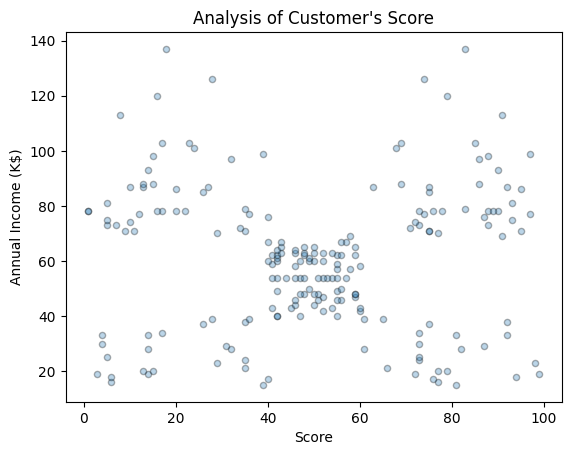

In [4]:
# Aqui geramos um gráfico de scatter visando mostrar a progressão do score com base na renda anual dos clientes listados no dataset

plt.scatter(x = df['score'], y = df['income_year_ks'], marker = '.', alpha = 0.3, ec = 'k', s = 80)
plt.xlabel('Score')
plt.ylabel('Annual Income (K$)')
plt.title("Analysis of Customer's Score")
plt.show()

In [5]:
X = df[['score', 'income_year_ks']] 

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=12)
kmeans.fit(X) 

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",12
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",None
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [6]:
k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_

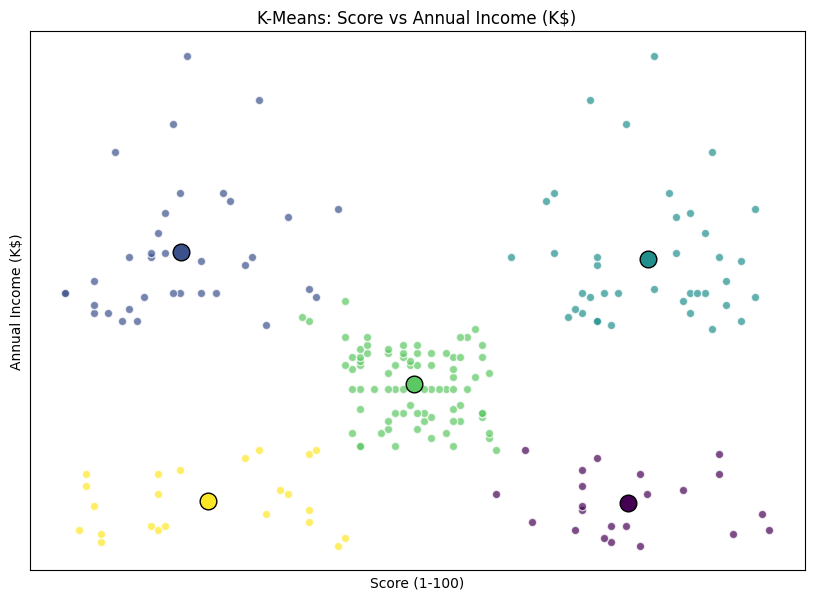

In [7]:
fig = plt.figure(figsize=(10, 7))

colors = plt.cm.viridis_r(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

X_arr = X.values

for k, col in zip(range(5), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(X_arr[my_members, 0], X_arr[my_members, 1], 'w', 
            markerfacecolor=col, marker='.', markersize=12, alpha=0.7)

    ax.plot(cluster_center[0], cluster_center[1], 'o', 
            markerfacecolor=col, markeredgecolor='k', markersize=12)

ax.set_title('K-Means: Score vs Annual Income (K$)')
ax.set_xlabel('Score (1-100)')
ax.set_ylabel('Annual Income (K$)')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

In [8]:
X1 = df[['score', 'income_year_ks', 'age']]
clusterNum = 3

k_means = KMeans(init = 'k-means++', n_clusters = 3, n_init = 12)
k_means.fit(X1)
labels = k_means.labels_

fig = px.scatter_3d(
    X1,
    x='score',
    y='income_year_ks',
    z='age',
    opacity=0.7,
    color=labels.astype(float)
)

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Score (1-100)'),
        yaxis=dict(title='Annual Income (K$)'),
        zaxis=dict(title='Age')
    )) 

fig.show()


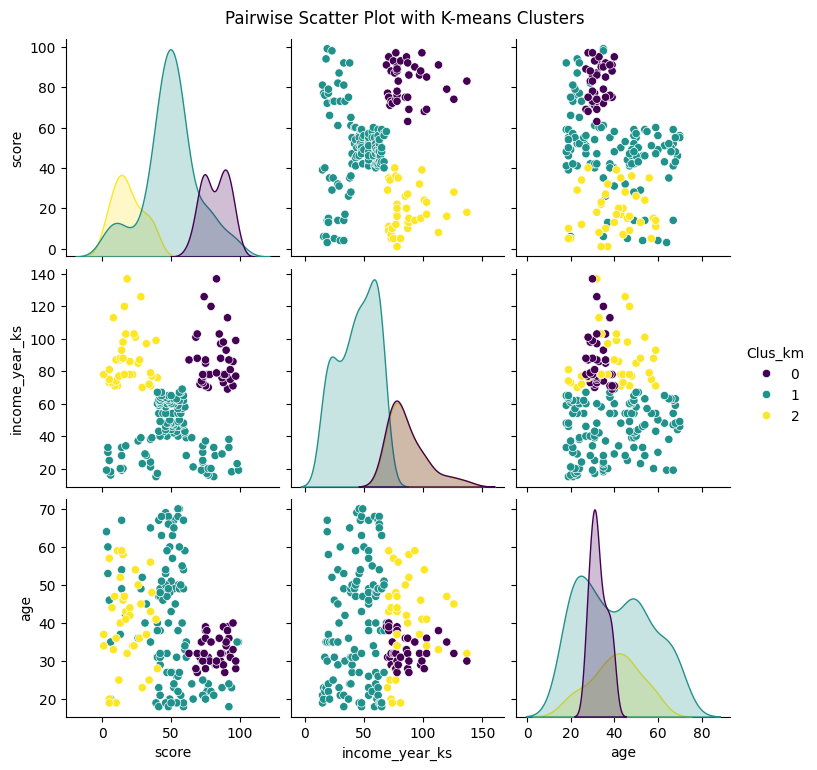

In [9]:
df_sub = df[['score', 'income_year_ks', 'age']].copy() 

df_sub['Clus_km'] = labels

sns.pairplot(df_sub, hue='Clus_km', palette='viridis', diag_kind='kde') 

plt.suptitle('Pairwise Scatter Plot with K-means Clusters', y=1.02)

plt.show()

#

---

#

# **Clustering, Dimension Reduction, and Feature Engineering**

> Agrupamento e Seleção de Características

- O agrupamento é uma técnica que ajuda na seleção e criação de características, facilitando a identificação de padrões nos dados. Ele permite agrupar características semelhantes, o que pode levar à seleção de uma característica representativa de cada grupo, reduzindo a redundância e preservando informações valiosas

> Redução de Dimensionalidade

- A redução de dimensionalidade é um passo pré-processamento essencial que simplifica a estrutura dos dados, melhorando os resultados. Técnicas como PCA, t-SNE e UMAP são utilizadas para reduzir a dimensionalidade antes da aplicação de algoritmos de agrupamento, aumentando a eficiência e a escalabilidade. Isso é especialmente importante em dados de alta dimensão, onde a similaridade entre os pontos de dados diminui à medida que a dimensionalidade aumenta.

- Os Algoritmos de Redução de Dimensionalidade são técnicas que ajudam a simplificar conjuntos de dados complexos, mantendo as informações mais importantes. Imagine que você tem uma grande caixa de lápis de cor, mas precisa escolher apenas algumas cores para fazer um desenho. 

- Os algoritmos, como PCA, t-SNE e UMAP, funcionam de maneira semelhante, ajudando a escolher as "cores" mais relevantes do seu conjunto de dados, para que você possa visualizar e analisar melhor as informações. O PCA, por exemplo, transforma os dados em novas variáveis chamadas componentes principais, que são como as cores escolhidas que ainda representam a essência do seu desenho.

> Aplicações Práticas

- Um exemplo prático é o uso de eigenfaces para reconhecimento facial, onde a PCA é aplicada a um conjunto de dados de rostos não rotulados. A redução de dimensionalidade preserva as características essenciais para a identificação, minimizando a carga computacional. Além disso, técnicas avançadas de redução de dimensionalidade permitem a visualização de resultados de agrupamento em duas ou três dimensões, facilitando a interpretação visual e a identificação de padrões.

- Esses conceitos são fundamentais para melhorar a qualidade e a interpretabilidade dos modelos de aprendizado de máquina, permitindo uma análise mais eficaz dos dados.



#

---

#

# **Classification Metrics and Evaluation Techniques**

##### Os modelos de avaliação de Machine Learning estabelecem quão bem um modelo performa em prever os resultados desejados. Um modelo de Machine Learning precisa ser submetido a essas métricas para sabermos mais detalhes acerca de sua performance e possível lançamento. Abaixo, visualize algumas das métricas mais utilizadas para testa a robustez de um modelo de ML:

> Train-Test-Split Technique

- A técnica de divisão treino-teste é usada para avaliar o desempenho de algoritmos de aprendizado de máquina, dividindo o conjunto de dados em duas partes: um conjunto de treinamento e um conjunto de teste. Normalmente, o conjunto de treinamento compreende 70-80% dos dados, que são usados para treinar o modelo, enquanto o conjunto de teste é reservado para avaliar como o modelo generaliza para dados não vistos. Essa abordagem é essencial para estimar o desempenho preditivo dos modelos de aprendizado de máquina.

> Accuracy

- A acurácia é uma métrica fundamental que mede a proporção de instâncias corretamente previstas em relação ao número total de instâncias no conjunto de dados. Ela fornece uma avaliação direta do desempenho geral do modelo, indicando com que frequência as previsões do modelo estão alinhadas com os resultados reais.

> Confusion Matrix

- Uma matriz de confusão é uma tabela que resume o desempenho de um modelo de classificação, comparando os rótulos de classe previstos com os rótulos de classe reais. Ela detalha as contagens de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos, permitindo uma análise detalhada do desempenho do modelo em diferentes classes.

> Precision

- A precisão é uma métrica que quantifica a exatidão das previsões positivas feitas pelo modelo. É calculada como o número de verdadeiros positivos dividido pelo número total de previsões positivas (verdadeiros positivos + falsos positivos). Alta precisão indica que uma grande proporção das instâncias previstas como positivas são realmente positivas, tornando-a particularmente importante em cenários onde falsos positivos acarretam custos significativos.

> Recall

- A revocação, também conhecida como sensibilidade, mede a capacidade do modelo de identificar instâncias positivas reais. É calculada como o número de verdadeiros positivos dividido pelo número total de instâncias positivas reais (verdadeiros positivos + falsos negativos). Alta revocação é crucial em situações onde perder uma instância positiva (falso negativo) pode ter consequências graves, como em diagnósticos médicos.

> F1 Score

- O F1 score é uma métrica que combina precisão e revocação em um único valor, fornecendo uma medida equilibrada do desempenho de um modelo. É calculado como a média harmônica de precisão e revocação, tornando-o particularmente útil quando ambas as métricas são importantes. O F1 score é especialmente relevante em casos onde há uma distribuição desigual de classes ou quando os custos de falsos positivos e falsos negativos são semelhantes.



##### Para testarmos essas métricas, utilizaremos o dataset ```heart.csv```, que possui dados essenciais acerca da probabilidade de um paciente sofrer de ataque cardíaco.

In [8]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,bp_category,chol_high,age_category,max_hr_ratio
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,3,0,2,0.955414
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,2,1,0,1.021858
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,2,0,0,0.960894
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,1,1.085366
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,1,1,1.000000


In [9]:
# Definindo o X (todas as variáveis exceto a de análise) e o Y (variável de análise) do df e normalizando elas usando o scaler.

X, y = df.drop(columns = ['target']), df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o ruído gaussiano ao dataset escalonado.

np.random.seed(42)
noise_factor = 0.5
X_noisy = X_scaled + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = X.shape)
features = X.columns

# Gerando um dataset normalizado e outro normalizado acrescido do ruído de Gauss
df = pd.DataFrame(X_scaled, columns=features)
df_noisy = pd.DataFrame(X_noisy, columns=features)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,bp_category,chol_high,age_category,max_hr_ratio
0,0.984640,0.670642,2.003188,0.755884,-0.247233,2.413364,-1.012933,0.015739,-0.706057,1.054744,-2.250996,-0.713471,-2.160160,1.199826,-0.979743,1.343809,0.424362
1,-1.895789,0.670642,1.024210,-0.085818,0.087792,-0.414359,0.910117,1.646515,-0.706057,2.076335,-2.250996,-0.713471,-0.531169,0.313990,1.020676,-1.617458,0.950097
2,-1.452646,-1.491108,0.045233,-0.085818,-0.818745,-0.414359,-1.012933,0.985389,-0.706057,0.288552,0.975360,-0.713471,-0.531169,0.313990,-0.979743,-1.617458,0.467721
3,0.209140,0.670642,0.045233,-0.646953,-0.188111,-0.414359,0.910117,1.249839,-0.706057,-0.222244,0.975360,-0.713471,-0.531169,-0.571847,-0.979743,-0.136824,1.452602
4,0.319926,-1.491108,-0.933744,-0.646953,2.137354,-0.414359,0.910117,0.588714,1.416316,-0.392509,0.975360,-0.713471,-0.531169,-0.571847,1.020676,-0.136824,0.777147


In [11]:
df_noisy.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,bp_category,chol_high,age_category,max_hr_ratio
0,1.232997,0.601510,2.327032,1.517399,-0.364309,2.296295,-0.223327,0.399456,-0.940794,1.326024,-2.482704,-0.946336,-2.039179,0.243186,-1.842202,1.062666,-0.082053
1,-1.738665,0.216630,0.318059,0.647006,-0.025096,-0.380595,0.197743,1.374323,-0.650596,1.500838,-2.063147,-1.013790,-0.677016,0.013136,1.946815,-1.624206,0.421242
2,-1.041373,-2.101530,0.149665,-1.065654,-1.482838,-0.315929,-0.643700,1.071073,-0.763881,0.138000,0.236099,-1.073393,-0.761489,0.842551,-0.807934,-2.498978,0.629763
3,0.016599,0.332181,0.351071,-0.131454,0.277529,-0.833968,0.755511,1.415471,-0.218284,-0.461831,0.882531,-1.266639,-1.129273,-0.165584,-0.301623,-0.172829,1.954368
4,0.500744,-1.813668,-0.753046,0.122065,2.119441,0.367962,-0.399756,0.999665,1.459840,-0.542012,1.021241,-1.707256,-0.641005,-0.393291,1.759623,-0.395959,0.372900


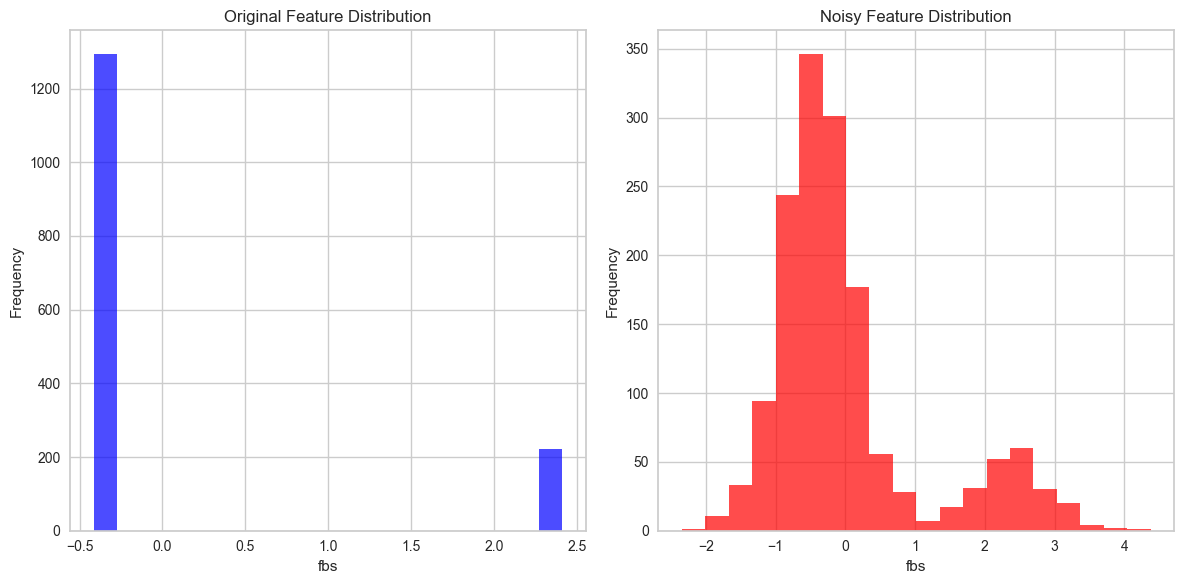

In [12]:
# Denotando o porque da utilização do ruído gaussiano na análise.

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df[features[5]], bins=20, alpha=0.7, color='blue', label='Original')
plt.title('Original Feature Distribution')
plt.xlabel(features[5])
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_noisy[features[5]], bins=20, alpha=0.7, color='red', label='Noisy') 
plt.title('Noisy Feature Distribution')
plt.xlabel(features[5])  
plt.ylabel('Frequency')

plt.tight_layout()  
plt.show()

In [13]:
# Determinando os dados em treino e teste, respeitando as definições de features e target que definimos acima
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size = 0.3, random_state = 42)

#Criando um classificador de método KNN e outro com o método SVM com kernel linear.
knn = KNeighborsClassifier(n_neighbors = 5)
svm = SVC(kernel = 'linear', C = 1, random_state = 42)

#Ajustando os modelos aos dados de treino.
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [14]:
# Submetendo os modelos ao percentual de testes da nossa base de dados normalizada.
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [15]:
# Avaliando as principais métricas de cada um dos modelos

print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

print("\nKNN Testing Data Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nSVM Testing Data Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Nessa avaliação podemos identificar que o modelo com a estratégia KNN performou quase 11% melhor do que o modelo de estratégia SVM.
# Isso se dá principalmente pelos bons índices de precisão e de revocação.

KNN Testing Accuracy: 0.921
SVM Testing Accuracy: 0.796

KNN Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       214
           1       0.91      0.95      0.93       241

    accuracy                           0.92       455
   macro avg       0.92      0.92      0.92       455
weighted avg       0.92      0.92      0.92       455


SVM Testing Data Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       214
           1       0.77      0.87      0.82       241

    accuracy                           0.80       455
   macro avg       0.80      0.79      0.79       455
weighted avg       0.80      0.80      0.79       455



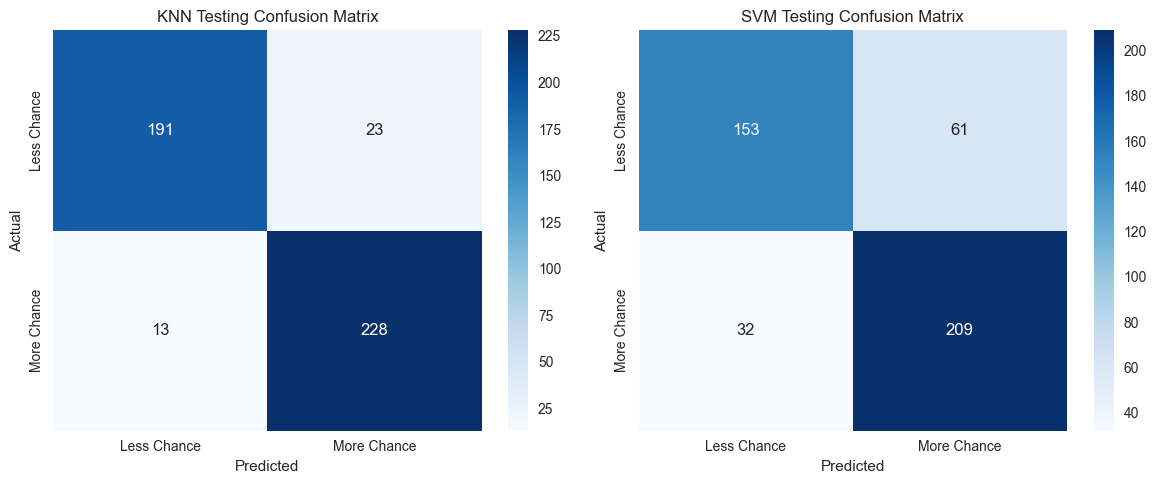

In [16]:
# Cálculo das matrizes de confusão para ambos os datasets
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

labels = ['Less Chance', 'More Chance']
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Criação do mapa de calor

sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)
axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()

> Interpretação

- O quadrado superior esquerdo representa os pacientes que representam menos chances de sofrerem um ataque cardíaco e que o modelo previu corretamente que teriam menos chances (Verdadeiro-negativo).
- O quadrado superior direito representa os pacientes que possuíam menos chance mas o modelo classificou-os como mais sucetíves a sofrerem de ataques cardíacos, configurando um alarme falso dos dados (Falsos-positivos).
- O quadrado inferior esquerdo representa os pacientes que possuíam maior chance de sofrerem ataques cardíacos mas o modelo classificou como menos sucetíves; para a área de análise da saúde, esse número deve ser minimizado ao máximo, visto que configura um perifo sério (Falso-negativos).
- O quadrado inferior direito representa os pacientes que possuíam maiores chances de sofrerem ataques cardíacos e que realmente possuíam mais chances de os possuírem (Verdadeiros-positivos)

> Dicas
- Diagonal esquerda-direita = índices devem ser maximizados
- Diagonal direita-esquerda = índices devem ser minimizados

---

# **Regression Metrics and Evaluation Techniques**


> Mean Absolute Error (MAE)
- MAE (Erro Absoluto Médio) é a média das diferenças absolutas entre os valores previstos pelo modelo e os valores observados. Em outras palavras, ele mede o quão longe, em média, as previsões estão dos valores reais. Um MAE menor indica que o modelo está fazendo previsões mais precisas. Por exemplo, se você previu as notas de um exame e as notas reais foram 80, 85 e 90, enquanto suas previsões foram 78, 88 e 92, o MAE seria a média das diferenças absolutas: |78-80| + |88-85| + |92-90| = 2 + 3 + 2 = 7, dividido pelo número de previsões (3), resultando em um MAE de aproximadamente 2,33. 

> Mean Squared Error (MSE)
- O MSE (Erro Quadrático Médio) é a média dos quadrados das diferenças entre os valores previstos e os valores reais. Ele penaliza mais os erros maiores, pois as diferenças são elevadas ao quadrado. Um MSE menor indica um modelo mais preciso. Usando as mesmas previsões e valores reais do exemplo anterior, o MSE seria calculado como: [(78-80)² + (88-85)² + (92-90)²] / 3 = [4 + 9 + 4] / 3 = 17 / 3, resultando em um MSE de aproximadamente 5,67. 

> Root Mean Squared Error (RMSE)
- O RMSE (Raiz do Erro Quadrático Médio) é a raiz quadrada do MSE. Ele é popular porque tem as mesmas unidades que a variável alvo, tornando mais fácil a interpretação. Um RMSE menor indica um modelo mais preciso. Continuando com o MSE de 5,67, o RMSE seria a raiz quadrada de 5,67, que é aproximadamente 2,38. Isso significa que, em média, suas previsões estão a cerca de 2,38 unidades dos valores reais. 

> R-squared
- O R² (Coeficiente de Determinação) mede a proporção da variância na variável dependente que pode ser explicada pelas variáveis independentes. Os valores variam de 0 a 1, onde 0 indica que o modelo não explica nada da variância e 1 indica que o modelo explica toda a variância. Valores entre 0 e 1 são comuns em cenários do mundo real. Se um modelo tem um R² de 0,85, isso significa que 85% da variação nas notas do exame pode ser explicada pelas variáveis que você usou no modelo. Isso é fácil de entender, mesmo para pessoas que não são técnicas.

In [ ]:
# Antes de criarmos um exemplo para analisarmos essas métricas em nossos modelos, vamos antes criar uma função que nos dê as métricas de cada uma de maneira simples.
def regression_results(y_true, y_pred, regr_type):

    # Métricas de regressão
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)
    
    print('Evaluation metrics for ' + regr_type + ' Linear Regression')
    print('explained_variance: ',  round(ev,4)) 
    print('r2: ', round(r2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print()

# Agora podemos analisar cada um desses indicadores em nossos modelos KNN e SVM, utilizados acima.
regression_results(y_test, y_pred_knn, 'KNN')
regression_results(y_test, y_pred_svm, 'SVM')

Evaluation metrics for KNN Linear Regression
explained_variance:  0.6843
r2:  0.6824
MAE:  0.0791
MSE:  0.0791
RMSE:  0.2813

Evaluation metrics for SVM Linear Regression
explained_variance:  0.1958
r2:  0.1795
MAE:  0.2044
MSE:  0.2044
RMSE:  0.4521



---

# **Evaluating Unsupervised Learning Models: Heuristics and Techniques**

##### A avaliação de modelos de Machine Learning não-supervisionados possui desafios únicos comparando com os modelos supervisionados, visto que não existem rótulo predefinidos ou verdades universais para o treinamento desses modelos. A estabilidade é crucial; os modelos devem apresentar desempenho consistente em diferentes subconjuntos de dados.

> Silhouette Score (Internal)

- Esta métrica mede quão similar um objeto é ao seu próprio agrupamento em comparação com outros agrupamentos. Ela varia de -1 a 1, com valores mais altos indicando agrupamentos melhor definidos. Um valor próximo de 1 sugere que o ponto de dados está bem agrupado, enquanto um valor próximo de -1 indica que pode ter sido atribuído ao agrupamento errado.

> Davies-Bouldin Index (Internal)

- Este índice avalia a razão média entre a distância entre os agrupamentos e o tamanho dos agrupamentos. Valores mais baixos indicam um melhor agrupamento, pois sugerem que os agrupamentos são compactos e bem separados uns dos outros.

> Inertia (Internal)

- Na agrupamento k-means, a inércia mede a soma das distâncias quadráticas entre os pontos de dados e seus respectivos centros de agrupamento. Valores de inércia mais baixos indicam agrupamentos mais compactos, mas aumentar o número de agrupamentos pode reduzir artificialmente a inércia, criando um trade-off.

> Adjusted Rand Index (ARI - External)

- Esta métrica compara a similaridade entre os rótulos verdadeiros e os resultados de agrupamento. Ela varia de -1 a 1, onde 1 indica perfeita concordância, 0 indica agrupamento aleatório e valores negativos sugerem desempenho pior que o aleatório.

> Normalized Mutual Information (NMI - External)

- A NMI quantifica a quantidade de informação compartilhada entre as atribuições de agrupamento previstas e os rótulos verdadeiros. Ela varia de 0 a 1, com 1 indicando perfeita concordância e 0 indicando nenhuma informação compartilhada.

> Fowlkes-Mallow Index (External)

- Este índice é a média geométrica da precisão e do recall com base nas atribuições de agrupamento e rótulos. Um escore mais alto indica melhor desempenho de agrupamento, refletindo o equilíbrio entre verdadeiros positivos e falsos positivos.

> Explained Variance Ratio (Dimensionality Red)

- Na Análise de Componentes Principais (PCA), esta métrica mede a proporção de variância capturada por cada componente principal. Ela ajuda a determinar quantos componentes são necessários para alcançar um nível desejado de variância explicada.

> Reconstruction Error (Dimensionality Red)

- Esta métrica avalia quão precisamente os dados originais podem ser reconstruídos a partir da representação reduzida. Erros de reconstrução mais baixos indicam melhor preservação da informação.

> Neighborhood Preservation (Dimensionality Red)

- Esta métrica avalia quão bem as relações entre os pontos de dados no espaço de alta dimensão são mantidas em dimensões mais baixas, especialmente para algoritmos como t-SNE e UMAP. É crucial para garantir que pontos similares permaneçam próximos uns dos outros após a redução de dimensionalidade.

##### Para validar um pouco do conhecimento acima, iremos aplicar os métodos de avaliação internos para o nosso trabalho com clustering de clientes por meio de seu score e de sua renda anual média. A avaliação será feita considerando a nossa análise bidimensional.

In [48]:
df = pd.read_csv('Mall_Customers.csv')

df.rename({'CustomerID' : 'customer_id', 'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)' : 'income_year_ks', 'Spending Score (1-100)' : 'score'}, axis = 1, inplace = True)

X = df[['score', 'income_year_ks']]

kmeans = KMeans(init='k-means++', n_clusters=5, n_init=12)

kmeans.fit(X) 

k_means_labels = kmeans.labels_

k_means_cluster_centers = kmeans.cluster_centers_

inertia = kmeans.inertia_

sil_score = silhouette_score(X, k_means_labels)

db_index = davies_bouldin_score(X, k_means_labels)

print(f"Inércia: {inertia:.2f}  - Inércia alta devido ao tamanho do dataset")
print(f"Silhouette Score: {sil_score:.4f} - O resultado indica uma estrutura sólida, com pouca sobreposição e grupos definidos.") 
print(f"Davies-Bouldin Index: {db_index:.4f} - O resultado confirma que os 5 clusters são compactos e distantes um do outro e justificam a sua divisão")

Inércia: 44448.46  - Inércia alta devido ao tamanho do dataset
Silhouette Score: 0.5539 - O resultado indica uma estrutura sólida, com pouca sobreposição e grupos definidos.
Davies-Bouldin Index: 0.5726 - O resultado confirma que os 5 clusters são compactos e distantes um do outro e justificam a sua divisão


---

# **Cross-Validation and Regularization**

> Cross-Validation
- A validação cruzada é uma técnica usada para avaliar a performance de um modelo de aprendizado de máquina. Em vez de usar apenas um conjunto de dados para treinar e testar o modelo, a validação cruzada divide os dados em várias partes, chamadas de "folds". Por exemplo, se você tiver 10 folds, o modelo será treinado em 9 deles e testado no fold restante. Esse processo é repetido várias vezes, garantindo que cada parte dos dados seja usada tanto para treinamento quanto para teste. Isso ajuda a garantir que o modelo não esteja apenas se ajustando a um conjunto específico de dados, mas sim aprendendo a generalizar para novos dados.

> Regularization
- A regularização é uma técnica utilizada em modelos de regressão linear para evitar o sobreajuste, que ocorre quando o modelo se adapta demais aos dados de treinamento, perdendo a capacidade de generalizar para novos dados. Em termos simples, a regularização ajuda a "conter" o modelo durante o treinamento, desencorajando-o de se ajustar excessivamente aos dados de treinamento. Isso é feito ao suprimir o tamanho dos coeficientes do modelo, o que significa que os valores que o modelo atribui a cada variável são reduzidos.
- Existem métodos comuns de regularização, como a regressão Ridge e a regressão Lasso, que diferem na forma como aplicam penalidades aos coeficientes. A regressão Ridge utiliza uma penalidade do tipo L2, que é a soma dos quadrados dos coeficientes, enquanto a regressão Lasso utiliza uma penalidade do tipo L1, que é a soma dos valores absolutos dos coeficientes. A Lasso é especialmente útil para seleção de características, pois pode reduzir alguns coeficientes a exatamente zero, ajudando a identificar quais variáveis são realmente importantes para o modelo.

##### Para testarmos essas estratégias, iremos integrar elas em um pipeline de dados que consiste na normalização dos dados utilizando ```StandardScaler()```, a redução das dimensões para duas utilizando ```PCA``` e classificando os outputs com base no método de ```K-Nearest Neighbors```.

In [24]:
#Carregando nosso dataset de possibilidade de infarto cardíaco.
df = pd.read_csv('heart.csv')
X, y = df.drop(columns = ['target']), df['target']


#Definindo o pipeline conforme descrito.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components = 2),),
    ('knn', KNeighborsClassifier(n_neighbors = 5))])

#Submetendo nossos dados para teste, aplicando o fit nos dados de treino e os introduzindo no pipeline.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

pipeline.fit(X_train, y_train)

test_score = pipeline.score(X_test, y_test)

print(f"The score of the test is {test_score:.3f}.")


The score of the test is 0.923.


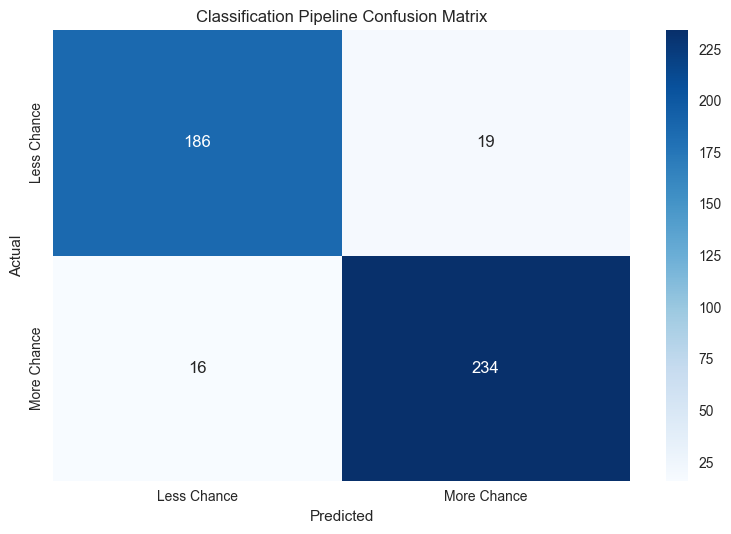

In [26]:
y_pred = pipeline.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=labels, yticklabels=labels)

plt.title('Classification Pipeline Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### **Análise da performance**

> Diferenciação do uso do Pipeline

- O modelo com o ```Pipeline``` se mostra superior principalmente pela forma como ele organiza o fluxo dos dados. Em vez de tratar o tratamento de dados e o treinamento como passos isolados, o Pipeline une tudo em um único processo coeso. Isso garante que a transformação que eu aplico nos dados de treino seja exatamente a mesma aplicada nos dados de teste, sem intervenção manual que poderia gerar erros.

> Impacto

- Como estou utilizando o ```K-Neighbors Classifier```, o Pipeline se torna quase obrigatório por causa do ```StandardScaler```. O KNN depende inteiramente do cálculo de distâncias entre os pontos. Sem o escalonamento dentro do Pipeline, variáveis com números maiores dominariam o cálculo de forma injusta. O Pipeline garante que o modelo "enxergue" todas as características do paciente (idade, pressão, colesterol) com o mesmo nível de importância.

> Diminuição de ruído com o PCA

- Outro ponto importante é a inclusão do ```PCA```. Ao reduzir o dataset para 2 componentes principais antes de passar para o classificador, o Pipeline ajuda a filtrar o que é "ruído" e foca no que realmente causa a variância nos dados. Isso simplifica o trabalho do KNN, resultando em fronteiras de decisão mais claras, o que justifica o baixo número de erros que vemos na matriz de confusão.

> Data Leakage

- Talvez o maior benefício técnico que obtive com essa abordagem foi a prevenção do vazamento de dados (Data Leakage). Ao rodar tudo via Pipeline, eu asseguro que as estatísticas do meu grupo de teste permaneçam ocultas durante o treino. O modelo não sofre "contaminação", o que torna o score de 92.3% muito mais realista e confiável para uma aplicação prática em diagnósticos médicos.

---

<div align="center">
  
##
  <table>
    <tr>
      <td align="center">
        <a href="https://github.com/idksizzlr">
          <img src="https://github.com/idksizzlr.png" width="120px;" style="border-radius: 50%;" alt="Vinicius Ferreira Leal"/><br />
          <sub><b>Vinicius Ferreira Leal</b></sub>
        </a>
      </td>
      <td>
        <b>📊 Premium Audit Analyst</b><br>
        Data & Financial analysis. 🚀<br><br>
        <a href="https://linkedin.com/in/viniciusfleal21/">
          <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn Badge">
        </a>
        <a href="mailto:viniciusfleal21@gmail.com">
          <img src="https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white" alt="Gmail Badge">
        </a>
        <a href="https://github.com/idksizzlr">
          <img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" alt="GitHub Badge">
        </a>
      </td>
    </tr>
  </table>

*Obrigado por acompanhar este estudo!*

</div>